## Model Comparison

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
models = ['yolo', 'fastrcnn', 'detecto']

### Load Model Metrics


In [4]:
dfs = {}

for model in models: 
    dfs[model] = pd.read_pickle(f"../results/model_{model}_metrics.pkl")


In [5]:
for model in models:
    if not 'model' in dfs[model]:
        dfs[model]['model'] = model

df = pd.concat(dfs.values())

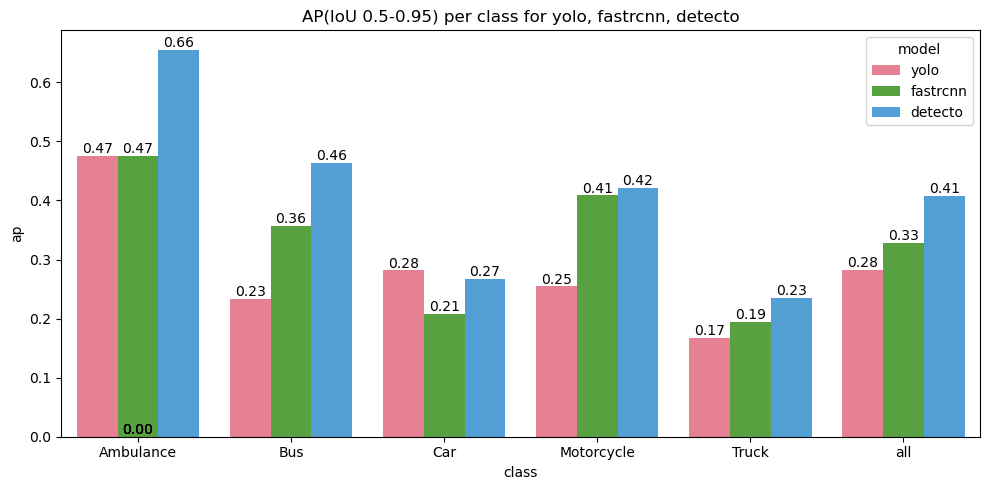

In [29]:
# Bar Plot for mAP per class and model
fig = plt.figure(figsize=(10, 5))
g = sns.barplot(x="class", y="ap", hue="model", data=df, palette="husl")
for p in g.patches:
    g.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title(f"AP(IoU 0.5-0.95) per class for {', '.join(models)}")
plt.tight_layout()
plt.show()

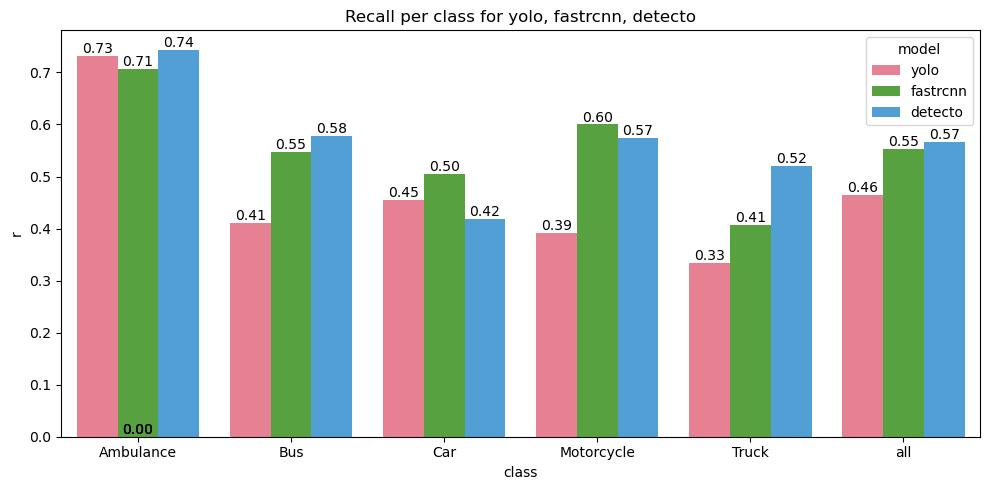

In [30]:
# Bar Plot for Recall per class and model
plt.figure(figsize=(10, 5))
g = sns.barplot(x='class', y='r', hue='model', data=df, palette='husl')
plt.title(f"Recall per class for {', '.join(models)}")
for p in g.patches:
    g.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.tight_layout()
plt.show()